In [1]:
import numpy as np 
import yaml
import os 
import matplotlib.pyplot as plt

def csvread(name):
    dataraw = open(name+'.csv','r')
    
    # Empty dictionary for each column
    data_rmsd = {}
    counter = 0
    for line in dataraw:
        if line.strip():
            line = line.strip("\n' '")
            line = line.split(",")
            # Storing the data in the dictionary
            if counter == 0:
                data_rmsd['frame'] = []
                counter += 1
                for j in np.arange(len(line)):
                    data_rmsd[str(j)] = []
            for i in np.arange(len(line)):
                element = line[i]
                if i == 0:
                    data_rmsd['frame'].append(int(element))
                else:
                    data_rmsd[str(i)].append(float(element))

    return data_rmsd


def refined_rmsd_resting(name):
    data = csvread(name)
    
    collected = []
    for n in np.arange(len(data)-2):
        test = data[str(n+1)][-1]
        if test < 500:
            collected.append(n+1)
            
    counter = 0 
    
    for m in collected:
        if counter == 0:
            total = np.asarray(data[str(m)])
            counter += 1
        else:
            total = total + np.asarray(data[str(m)])
    
    avg = total/len(collected)
    
    msd = avg*avg
    
    return avg, msd, data['frame']

def refined_rmsd_activated(name):
    data = csvread(name)
    
    collected = []
    for n in np.arange(len(data)-2):
        test = data[str(n+1)][-1]
        if test < 100:
            collected.append(n+1)
            
    counter = 0 
    
    for m in collected:
        if counter == 0:
            total = np.asarray(data[str(m)])
            counter += 1
        else:
            total = total + np.asarray(data[str(m)])
    
    avg = total/len(collected)
    
    msd = avg*avg
    
    return avg, msd, data['frame']

In [2]:
avg1, msd1, time1 = refined_rmsd_resting('restingrmsd1')
avg2, msd2, time2 = refined_rmsd_resting('restingrmsd2')

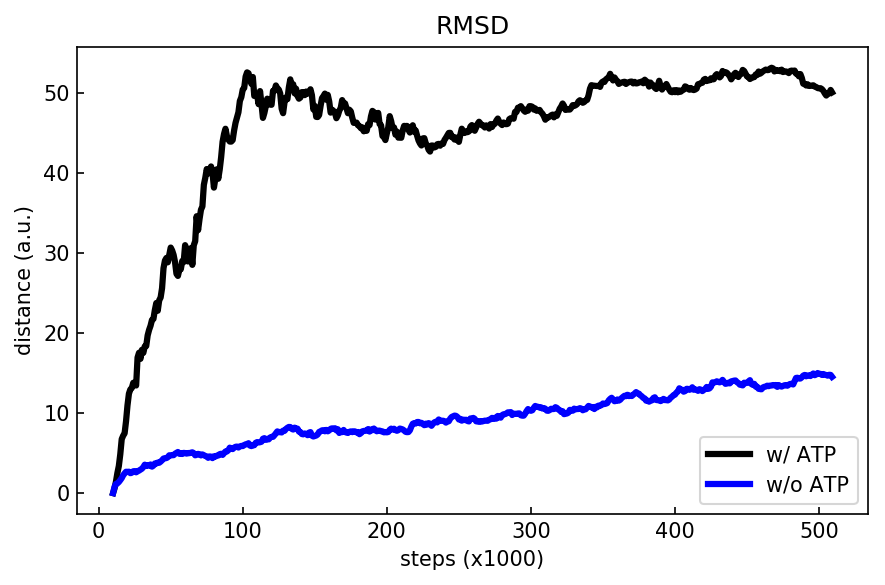

In [4]:
plt.figure(figsize=(6,4),dpi=150)
plt.tick_params(direction='in',labelsize=10)
plt.title('RMSD')
plt.plot(time1,avg1,'k',lw=3,alpha=1,label='w/ ATP')
plt.plot(time2,avg2,'b',lw=3,alpha=1,label='w/o ATP')
plt.xlabel('steps (x1000)')
plt.ylabel('distance (a.u.)')
plt.legend(loc=0)
plt.tight_layout()